In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import plotly
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [ ]:
import statsmodels.formula.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [ ]:
!pip install catboost

In [ ]:
# Import Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

#import the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/1960_onwards.csv')
df.head()

,Year,Consumer price index (2010 = 100),GDP (constant LCU),GDP (current LCU),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)",Livestock production index (2014-2016 = 100),...,Other Assets Net,Money Supply M2,CBN Bills,Special Intervention Reserves,GDPBillions of US $,Per CapitaUS $,Growth RateAnnual % Change,Petrol Price (Naira),Food imports (% of merchandise imports),Food exports (% of merchandise imports)
0,1960,0.065886,9.280000e+12,2.997269e+09,0.191795,93.397048,-1.834010,6.257169,5.444327,17.19,...,4.49,272.40,2447132.17,258214.99,4.196175,93.3970,0.0000,0.05,14.129951,64.523594
1,1961,0.070023,9.300000e+12,3.190921e+09,0.191795,97.420968,-1.834010,6.257169,6.279147,17.19,...,-14.56,292.83,2447132.17,258214.99,4.467288,97.4210,0.1918,0.05,14.129951,64.523594
2,1962,0.073710,9.680000e+12,3.506715e+09,4.102993,104.852749,1.954451,5.565301,5.265632,15.71,...,-17.91,325.43,2447132.17,258214.99,4.909399,104.8527,4.1030,0.05,14.129951,64.523594
3,1963,0.071724,1.050000e+13,3.689709e+09,8.578619,108.015742,6.306528,-3.094752,-2.694655,15.95,...,-9.20,361.82,2447132.17,258214.99,5.165590,108.0157,8.5786,0.05,12.139264,62.312145
4,1964,0.072338,1.100000e+13,3.966381e+09,4.950489,113.658375,2.729816,2.427809,0.856793,17.60,...,-0.49,430.49,2447132.17,258214.99,5.552931,113.6584,4.9505,0.05,9.237443,61.003786


In [ ]:
df.shape

(65, 44)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 44 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Year                                                      65 non-null     int64  
 1   Consumer price index (2010 = 100)                         65 non-null     float64
 2   GDP (constant LCU)                                        65 non-null     float64
 3   GDP (current LCU)                                         65 non-null     float64
 4   GDP growth (annual %)                                     65 non-null     float64
 5   GDP per capita (current US$)                              65 non-null     float64
 6   GDP per capita growth (annual %)                          65 non-null     float64
 7   Inflation, GDP deflator (annual %)                        65 non-null     float64
 8   Inflation, consumer pr

In [ ]:
df.columns

Index(['Year', 'Consumer price index (2010 = 100)', 'GDP (constant LCU)',
       'GDP (current LCU)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Inflation, consumer prices (annual %)',
       'Livestock production index (2014-2016 = 100)',
       'Official exchange rate (LCU per US$, period average)',
       'Total reserves (includes gold, current US$)', 'Population, total',
       'Population, female', 'Population, male',
       'Population ages 0-14 (% of total population)',
       'Population ages 15-64 (% of total population)',
       'Population ages 65 and above (% of total population)',
       'Trade Openness Index(%)', 'Crude oil price(per barrel in $)',
       'Cumulative crude oil production up to and including year',
       'Narrow Money', 'Money Supply M3', 'Net Foreign Assets',
       'Net Domestic Credit', 'Credit to Government',
       'Credit to Private Sector',

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,65.0,1.992000e+03,1.890767e+01,1.960000e+03,1.976000e+03,1.992000e+03,2.008000e+03,2.024000e+03
Consumer price index (2010 = 100),65.0,6.645637e+01,1.126278e+02,6.588596e-02,2.353848e-01,3.944130e+00,7.812464e+01,4.210711e+02
GDP (constant LCU),65.0,3.233231e+13,2.189721e+13,9.210000e+12,1.720000e+13,2.190000e+13,4.680000e+13,7.580000e+13
GDP (current LCU),65.0,3.299694e+13,5.743093e+13,2.997269e+09,2.861140e+10,9.060000e+11,4.000000e+13,2.020000e+14
GDP growth (annual %),65.0,3.607878e+00,6.791425e+00,-1.574363e+01,1.917955e-01,4.102993e+00,6.591130e+00,2.500724e+01
GDP per capita (current US$),65.0,1.130456e+03,8.906273e+02,9.339705e+01,4.744569e+02,7.623987e+02,1.941879e+03,3.200953e+03
GDP per capita growth (annual %),65.0,1.012475e+00,6.649861e+00,-1.750031e+01,-1.941106e+00,1.182828e+00,3.609661e+00,2.228860e+01
"Inflation, GDP deflator (annual %)",65.0,1.745541e+01,2.899952e+01,-3.094752e+00,5.653664e+00,1.038478e+01,1.966948e+01,2.190028e+02
"Inflation, consumer prices (annual %)",65.0,1.594439e+01,1.480265e+01,-3.726337e+00,7.697747e+00,1.222424e+01,1.786349e+01,7.283550e+01
Livestock production index (2014-2016 = 100),65.0,6.153462e+01,3.226000e+01,1.571000e+01,3.192000e+01,5.524000e+01,9.288000e+01,1.129100e+02


In [ ]:
df.isnull().sum()

Year                                                        0
Consumer price index (2010 = 100)                           0
GDP (constant LCU)                                          0
GDP (current LCU)                                           0
GDP growth (annual %)                                       0
GDP per capita (current US$)                                0
GDP per capita growth (annual %)                            0
Inflation, GDP deflator (annual %)                          0
Inflation, consumer prices (annual %)                       0
Livestock production index (2014-2016 = 100)                0
Official exchange rate (LCU per US$, period average)        0
Total reserves (includes gold, current US$)                 0
Population, total                                           0
Population, female                                          0
Population, male                                            0
Population ages 0-14 (% of total population)                0
Populati

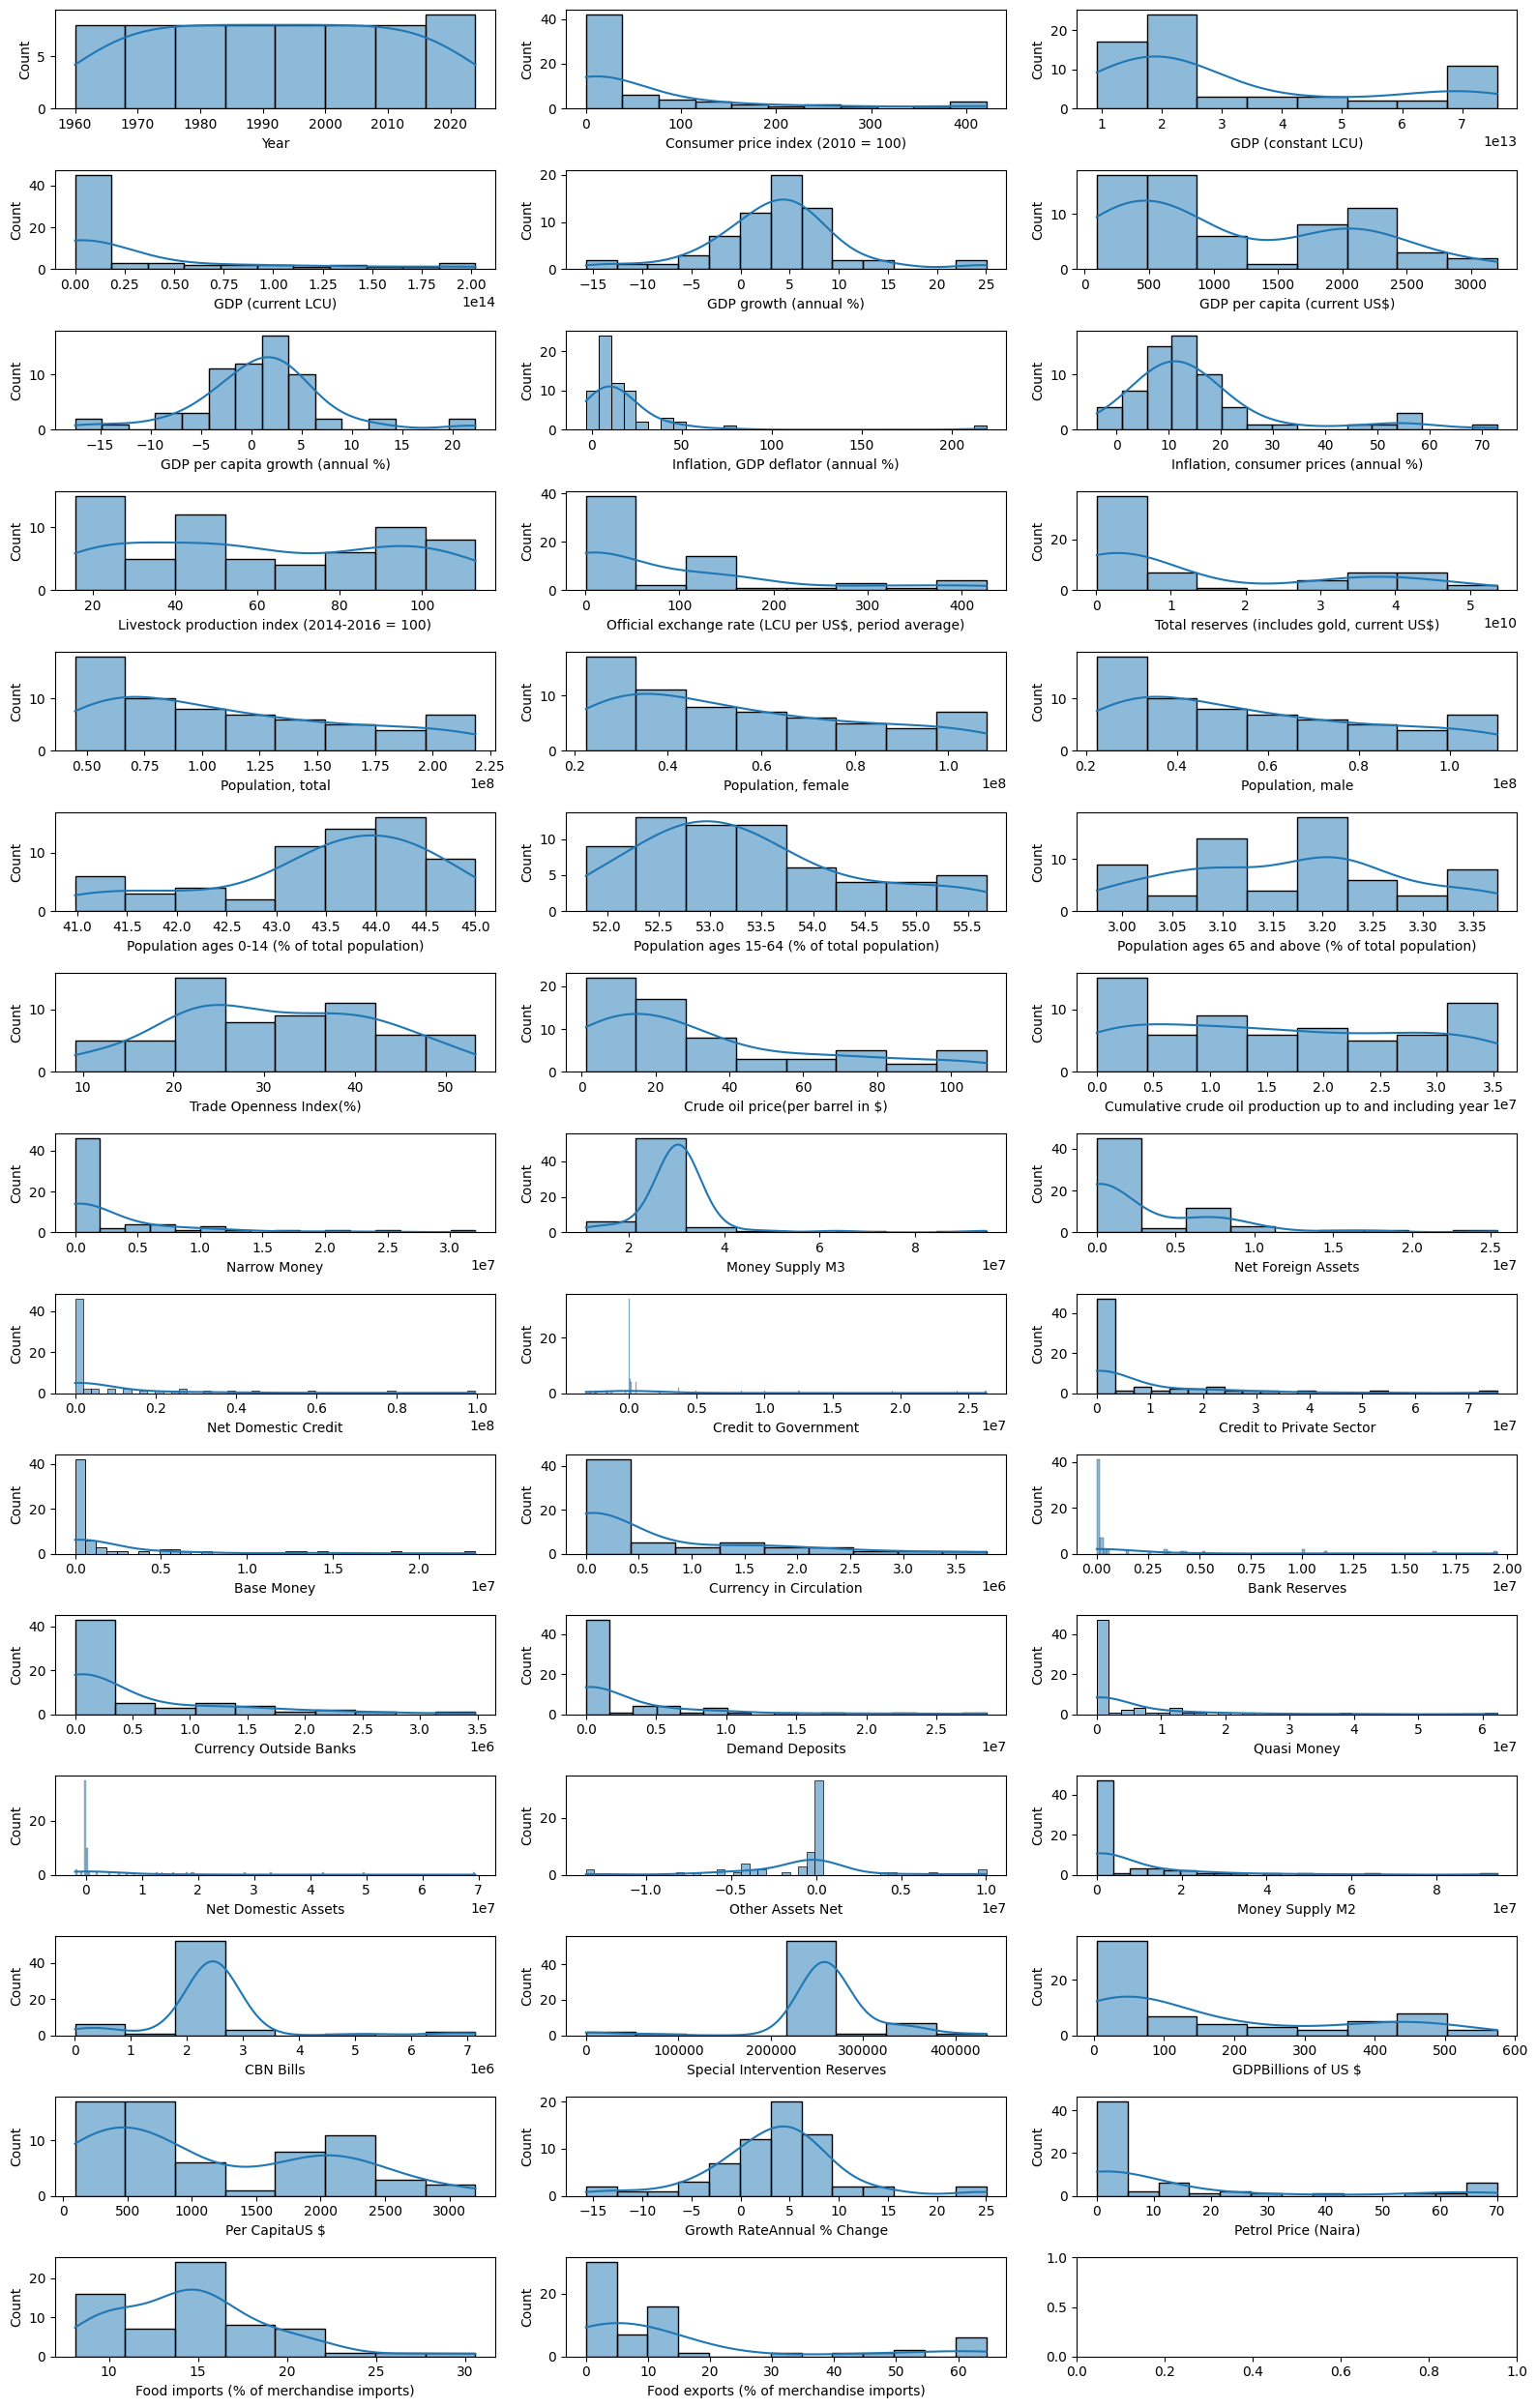

In [ ]:
# Histogram plot:

num_rows = 15
num_cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(df.columns):
    # Create a histogram plot
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Correlation Analysis

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
df_corr = numeric_df.corr(method='pearson')
df_corr= df_corr.applymap("{:.2f}".format)
#df_corr

In [ ]:
df_corr["Consumer price index (2010 = 100)"].sort_values(ascending=False)

Consumer price index (2010 = 100)                            1.00
GDP (current LCU)                                            0.99
Official exchange rate (LCU per US$, period average)         0.98
Currency Outside Banks                                       0.98
Currency in Circulation                                      0.98
Narrow Money                                                 0.97
Base Money                                                   0.96
Demand Deposits                                              0.96
Credit to Private Sector                                     0.95
Net Domestic Credit                                          0.95
Money Supply M2                                              0.94
Net Domestic Assets                                          0.94
Bank Reserves                                                0.93
Quasi Money                                                  0.92
GDP (constant LCU)                                           0.90
Population

**Insight into 'Consumer price index (2010 = 100)'**

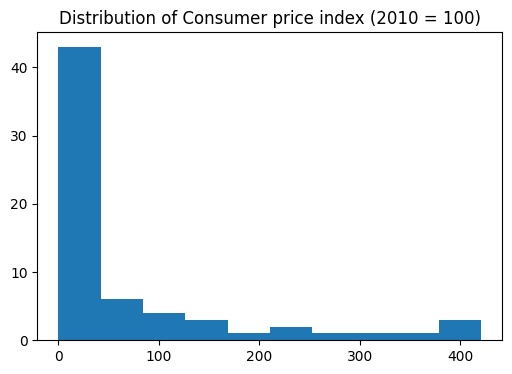

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df['Consumer price index (2010 = 100)'])
plt.title('Distribution of Consumer price index (2010 = 100)')
plt.show()

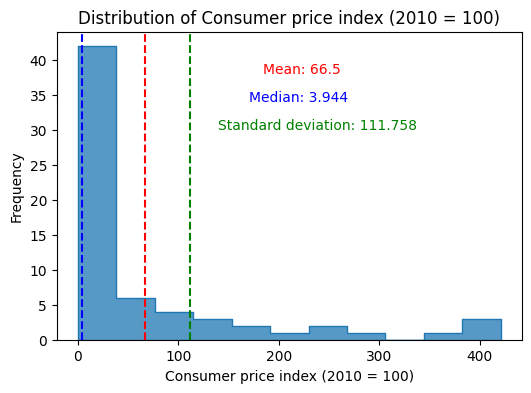

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Consumer price index (2010 = 100)', element='step', common_norm=False)


mean = np.mean(df['Consumer price index (2010 = 100)'])
median = np.median(df['Consumer price index (2010 = 100)'])
std_deviation = np.std(df['Consumer price index (2010 = 100)'])

plt.axvline(mean, color='red', linestyle='--')
plt.axvline(median, color='blue', linestyle='--')
plt.axvline(x=std_deviation, color='green', linestyle='--')

# annotate mean,median & Standard deviation
plt.annotate(f'Mean: {mean:.3}', xy=(mean, plt.gca().get_ylim()[1]), xytext=(85, -30),
             textcoords='offset points', color='red', fontsize=10)
plt.annotate(f'Median: {median:.3f}', xy=(median, plt.gca().get_ylim()[1]), xytext=(120, -50),
             textcoords='offset points', color='blue', fontsize=10)
plt.annotate(f'Standard deviation: {std_deviation:.3f}', xy=(std_deviation, plt.gca().get_ylim()[1]), xytext=(20, -70),
           textcoords='offset points', color='green', fontsize=10)
plt.xlabel('Consumer price index (2010 = 100)')
plt.ylabel('Frequency')
plt.title('Distribution of Consumer price index (2010 = 100)')
plt.show()

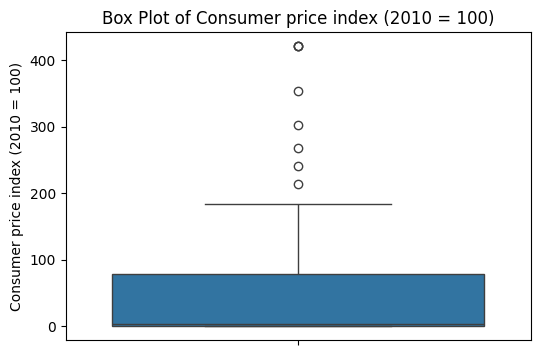

In [ ]:
# Create a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(y='Consumer price index (2010 = 100)', data=df)
plt.ylabel('Consumer price index (2010 = 100)')
plt.title('Box Plot of Consumer price index (2010 = 100)')
plt.show()

In [ ]:
# Logarithmic Transformation
df['Consumer price index (2010 = 100)'] = np.log1p(df['Consumer price index (2010 = 100)'])
# df['Consumer price index (2010 = 100)'] = np.sqrt(df['Consumer price index (2010 = 100)'])

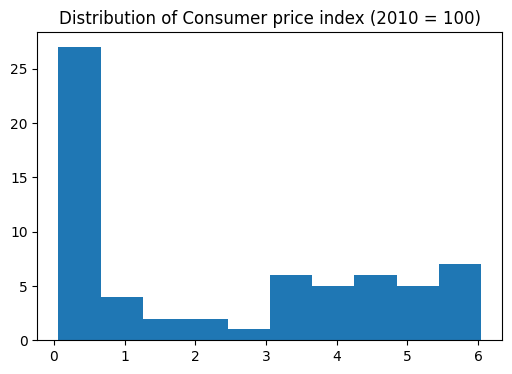

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df['Consumer price index (2010 = 100)'])
plt.title('Distribution of Consumer price index (2010 = 100)')
plt.show()

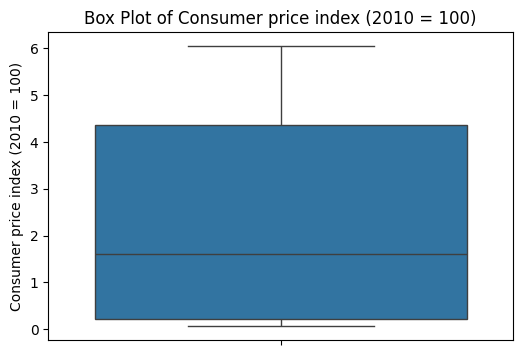

In [ ]:
# Create a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(y='Consumer price index (2010 = 100)', data=df)
plt.ylabel('Consumer price index (2010 = 100)')
plt.title('Box Plot of Consumer price index (2010 = 100)')
plt.show()

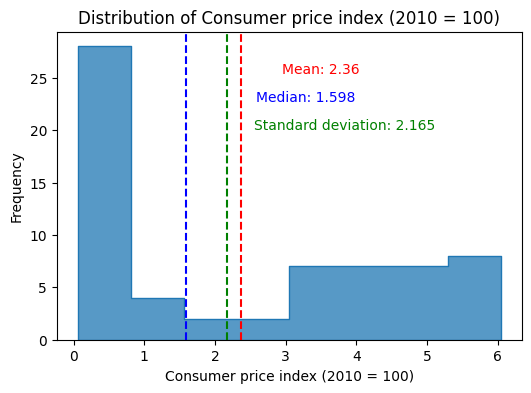

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Consumer price index (2010 = 100)', element='step', common_norm=False)


mean = np.mean(df['Consumer price index (2010 = 100)'])
median = np.median(df['Consumer price index (2010 = 100)'])
std_deviation = np.std(df['Consumer price index (2010 = 100)'])

plt.axvline(mean, color='red', linestyle='--')
plt.axvline(median, color='blue', linestyle='--')
plt.axvline(x=std_deviation, color='green', linestyle='--')

# annotate mean,median & Standard deviation
plt.annotate(f'Mean: {mean:.3}', xy=(mean, plt.gca().get_ylim()[1]), xytext=(30, -30),
             textcoords='offset points', color='red', fontsize=10)
plt.annotate(f'Median: {median:.3f}', xy=(median, plt.gca().get_ylim()[1]), xytext=(50, -50),
             textcoords='offset points', color='blue', fontsize=10)
plt.annotate(f'Standard deviation: {std_deviation:.3f}', xy=(std_deviation, plt.gca().get_ylim()[1]), xytext=(20, -70),
           textcoords='offset points', color='green', fontsize=10)
plt.xlabel('Consumer price index (2010 = 100)')
plt.ylabel('Frequency')
plt.title('Distribution of Consumer price index (2010 = 100)')
plt.show()

## Modeling - Target : 'Consumer price index (2010 = 100)' - All Features

In [ ]:
X = df.drop(columns=["Year", "Consumer price index (2010 = 100)"])
y = df['Consumer price index (2010 = 100)']

In [ ]:
X.columns

Index(['GDP (constant LCU)', 'GDP (current LCU)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Inflation, consumer prices (annual %)',
       'Livestock production index (2014-2016 = 100)',
       'Official exchange rate (LCU per US$, period average)',
       'Total reserves (includes gold, current US$)', 'Population, total',
       'Population, female', 'Population, male',
       'Population ages 0-14 (% of total population)',
       'Population ages 15-64 (% of total population)',
       'Population ages 65 and above (% of total population)',
       'Trade Openness Index(%)', 'Crude oil price(per barrel in $)',
       'Cumulative crude oil production up to and including year',
       'Narrow Money', 'Money Supply M3', 'Net Foreign Assets',
       'Net Domestic Credit', 'Credit to Government',
       'Credit to Private Sector', 'Base Money', 'Currency in Circulation',
       'Ba

In [ ]:
num_var = ['GDP (constant LCU)', 'GDP (current LCU)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)','Inflation, GDP deflator (annual %)',
       'Inflation, consumer prices (annual %)','Livestock production index (2014-2016 = 100)','Official exchange rate (LCU per US$, period average)',
       'Total reserves (includes gold, current US$)', 'Population, total',
       'Population, female', 'Population, male','Population ages 0-14 (% of total population)',
       'Population ages 15-64 (% of total population)','Population ages 65 and above (% of total population)',
       'Trade Openness Index(%)', 'Crude oil price(per barrel in $)', 'Cumulative crude oil production up to and including year','Narrow Money', 'Money Supply M3', 'Net Foreign Assets',
       'Net Domestic Credit', 'Credit to Government','Credit to Private Sector', 'Base Money', 'Currency in Circulation',
      'Bank Reserves', 'Currency Outside Banks', 'Demand Deposits','Quasi Money', 'Net Domestic Assets', 'Other Assets Net',
       'Money Supply M2', 'CBN Bills', 'Special Intervention Reserves','GDPBillions of US $', 'Per CapitaUS $', 'Growth RateAnnual % Change',
       'Petrol Price (Naira)', 'Food imports (% of merchandise imports)','Food exports (% of merchandise imports)']

#cat_var = []
y = df['Consumer price index (2010 = 100)']
X = df[num_var]
y = pd.DataFrame(y, columns=['Consumer price index (2010 = 100)'])

In [ ]:
# Train-test split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 , shuffle=True)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (45, 42)
X_test.shape: (20, 42)
y_train.shape: (45, 1)
y_test.shape: (20, 1)


In [ ]:
# Preprocessing with pipelines

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


#pipeline_categorical = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore")),])

pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1))),])

pipeline_full = ColumnTransformer([("numerical", pipeline_numerical, num_var)])

In [ ]:
# Apply the pipeline

pipeline_full.fit(X_train)

X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)

print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print()
print('X_train_transformed:', type(X_train_transformed))
print('X_test_transformed:', type(X_test_transformed))

X_train_transformed.shape: (45, 42)
X_test_transformed.shape: (20, 42)

X_train_transformed: <class 'numpy.ndarray'>
X_test_transformed: <class 'numpy.ndarray'>


In [ ]:
RFR = RandomForestRegressor(random_state=42)
RFR.fit(X_train_transformed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred =RFR.predict(X_test_transformed)

In [ ]:
# Evaluation Metric of Best Model:

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2 Score: 0.9962725404381348
MAE: 0.08275043276337551
MSE: 0.018148119361318472
RMSE: 0.13471495596747404


# Important Features Analysis

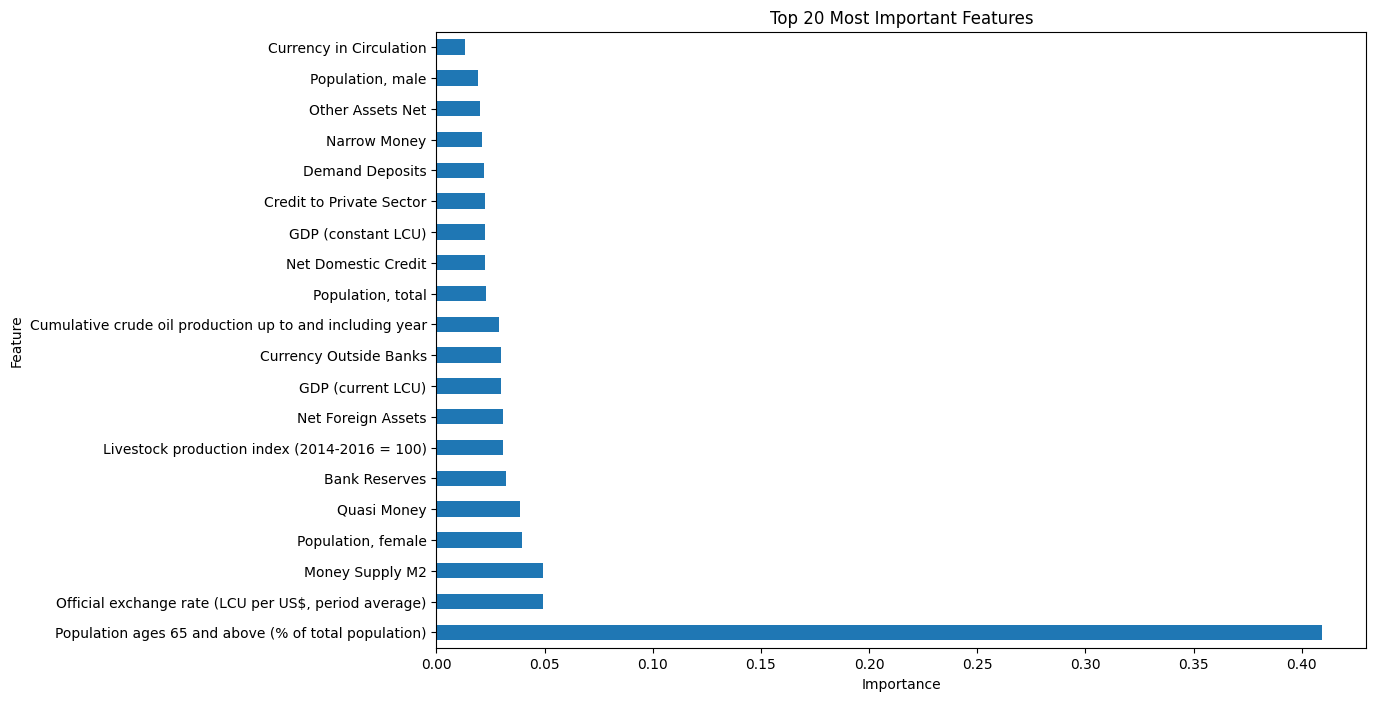

In [ ]:
RFR = RandomForestRegressor(random_state=42)
RFR.fit(X_train_transformed, y_train)

# Get feature importances
feature_importances = RFR.feature_importances_

# Create a Series with feature importances and sort it
#feat_importances = pd.Series(feature_importances, index=onehot_columns + num_var)
feat_importances = pd.Series(RFR.feature_importances_, index=X.columns )
feat_importances_sorted = feat_importances.sort_values(ascending=False)

# Select the top 20 most important features
top_20_features = feat_importances_sorted[:20]

# Plot graph of sorted feature importances for better visualization
plt.figure(figsize=(12, 8))
top_20_features.plot(kind='barh', fontsize=10)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features')
plt.show()

In [ ]:
top_20_features

Population ages 65 and above (% of total population)        0.409385
Official exchange rate (LCU per US$, period average)        0.049259
Money Supply M2                                             0.049054
Population, female                                          0.039790
Quasi Money                                                 0.038608
Bank Reserves                                               0.032108
Livestock production index (2014-2016 = 100)                0.030776
Net Foreign Assets                                          0.030684
GDP (current LCU)                                           0.029963
Currency Outside Banks                                      0.029678
Cumulative crude oil production up to and including year    0.028724
Population, total                                           0.022733
Net Domestic Credit                                         0.022620
GDP (constant LCU)                                          0.022280
Credit to Private Sector          

# Forward Feature Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Perform forward feature selection
sfs_forward = SFS(RFR,
                  k_features='best',
                  forward=True,
                  floating=False,
                  scoring='neg_mean_squared_error',
                  cv=5)

sfs_forward.fit(X_train_transformed, y_train.values.ravel())

# Selected features using forward selection
selected_features_forward_indices = sfs_forward.k_feature_idx_
selected_features_forward_names = [num_var[i] for i in selected_features_forward_indices]
print(f'Selected features (Forward): {selected_features_forward_names}')


Selected features (Forward): ['GDP (current LCU)', 'Official exchange rate (LCU per US$, period average)', 'Population, total', 'Cumulative crude oil production up to and including year', 'Narrow Money', 'Credit to Private Sector', 'Currency in Circulation', 'Demand Deposits']


**Following features were selected by forward feature selection:**

'GDP (current LCU)'

'Official exchange rate (LCU per US$, period average)'

'Population, total'

'Cumulative crude oil production up to and including year'

'Narrow Money'

 'Credit to Private Sector'

 'Currency in Circulation'

 'Demand Deposits'

**Considering both methods, the selected features for modeling are:**

GDP (current LCU)

Official exchange rate (LCU per US$, period average)

Population, total

Cumulative crude oil production up to and including year

Narrow Money

Credit to Private Sector

Demand Deposits

Population ages 65 and above (% of total population)

Money Supply M2

Population, female

Quasi Money

Bank Reserves

Livestock production index (2014-2016 = 100)

Net Foreign Assets

GDP (constant LCU)

# Modeling - Target : 'Consumer price index (2010 = 100)' - Selected Features

In [ ]:
num_var = ['GDP (current LCU)',
    'Official exchange rate (LCU per US$, period average)',
    'Population, total',
    'Cumulative crude oil production up to and including year',
    'Narrow Money',
    'Credit to Private Sector',
    'Demand Deposits',
    'Population ages 65 and above (% of total population)',
    'Money Supply M2',
    'Population, female',
    'Quasi Money',
    'Bank Reserves',
    'Livestock production index (2014-2016 = 100)',
    'Net Foreign Assets',
    'GDP (constant LCU)']

#cat_var = []
y = df['Consumer price index (2010 = 100)']
X = df[num_var]
y = pd.DataFrame(y, columns=['Consumer price index (2010 = 100)'])

In [ ]:
# Train-test split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 , shuffle=True)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (45, 15)
X_test.shape: (20, 15)
y_train.shape: (45, 1)
y_test.shape: (20, 1)


In [ ]:
# Preprocessing with pipelines

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


#pipeline_categorical = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore")),])

pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1))),])

pipeline_full = ColumnTransformer([("numerical", pipeline_numerical, num_var)])

In [ ]:
# Apply the pipeline

pipeline_full.fit(X_train)

X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)

print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print()
print('X_train_transformed:', type(X_train_transformed))
print('X_test_transformed:', type(X_test_transformed))

X_train_transformed.shape: (45, 15)
X_test_transformed.shape: (20, 15)

X_train_transformed: <class 'numpy.ndarray'>
X_test_transformed: <class 'numpy.ndarray'>


In [ ]:
models = {
    #'LinearRegression': LinearRegression(),
    'LassoRegressor': Lasso(max_iter=10000, random_state=42),
    'RidgeRegressor': Ridge(max_iter=10000, random_state=42),
    "ElasticNet": ElasticNet(alpha=0.02, random_state=42),
    "KNN": KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(),
    'RFR': RandomForestRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=5, random_state=42),
    'ADABoost': AdaBoostRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

In [ ]:
# Train multiple models

model_list=[]
r2_list=[]
mae_list=[]
mse_list=[]
rmse_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_transformed,y_train)

    #Make Predictions
    y_pred=model.predict(X_test_transformed)

    # Evaluation Metric:
    #r2 = model.score(X_test_transformed, y_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mean_squared_error(y_test, y_pred))

    model_list.append(list(models.keys())[i])
    r2_list.append(r2)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

    # Print the performance metrics for each model
    print(f"Model: {list(models.keys())[i]}")
    print(f"R2 Score: {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print("="*30)

Model: LassoRegressor
R2 Score: -0.04324871738017677
MAE: 2.0747472132195943
MSE: 5.079331360226464
RMSE: 2.253737198571844
Model: RidgeRegressor
R2 Score: 0.9733881190588739
MAE: 0.3069596974753953
MSE: 0.12956695672563817
RMSE: 0.3599541036377251
Model: ElasticNet
R2 Score: 0.9736230582006761
MAE: 0.3032429582982422
MSE: 0.12842309358847842
RMSE: 0.35836167985497336
Model: KNN
R2 Score: 0.9968884728262911
MAE: 0.07761419657063448
MSE: 0.015149290182023966
RMSE: 0.1230824527787124
Model: DTR
R2 Score: 0.9938273046399692
MAE: 0.10485796262163183
MSE: 0.030053394360324337
RMSE: 0.1733591484760015
Model: SVR
R2 Score: 0.9612333296594925
MAE: 0.19241578595037886
MSE: 0.1887457526778287
RMSE: 0.4344487917785348
Model: RFR
R2 Score: 0.9982215985893446
MAE: 0.05499963037512293
MSE: 0.008658616019099443
RMSE: 0.09305168466556338
Model: ExtraTrees
R2 Score: 0.9967317955745216
MAE: 0.059398101070344246
MSE: 0.015912114679278243
RMSE: 0.12614323081036985
Model: ADABoost
R2 Score: 0.9927954852571

In [ ]:
# Create a DF for Result:

results_df = pd.DataFrame({
    'Model': model_list,
    'R2 Score': r2_list,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list})

results_df.sort_values(by="RMSE", ascending=True)

,Model,R2 Score,MAE,MSE,RMSE
10,CatBoost,0.998494,0.056024,0.007333,0.085633
6,RFR,0.998222,0.055000,0.008659,0.093052
3,KNN,0.996888,0.077614,0.015149,0.123082
7,ExtraTrees,0.996732,0.059398,0.015912,0.126143
4,DTR,0.993827,0.104858,0.030053,0.173359
8,ADABoost,0.992795,0.134556,0.035077,0.187289
9,XGBoost,0.989500,0.124706,0.051122,0.226101
2,ElasticNet,0.973623,0.303243,0.128423,0.358362
1,RidgeRegressor,0.973388,0.306960,0.129567,0.359954
5,SVR,0.961233,0.192416,0.188746,0.434449


In [ ]:
# Find the index of the model with the best r2 score
best_index_r2 = r2_list.index(max(r2_list))

# Find the index of the model with the best mae score
best_index_mae = mae_list.index(min(mae_list))

# Find the index of the model with the best mse score
best_index_mse = mse_list.index(min(mse_list))

# Find the index of the model with the best rmse score
best_index_rmse = rmse_list.index(min(rmse_list))

# Determine the model with the best performance based on the chosen metric
best_r2_model = model_list[best_index_r2]
best_mae_model = model_list[best_index_mae]
best_mse_model = model_list[best_index_mse]
best_rmse_model = model_list[best_index_rmse]

# Print the best models and their corresponding metric
print("The model with the best R2 score is:", best_r2_model)
print("R2 score:", r2_list[best_index_r2])
print("="*40)
print("The model with the best MAE score is:", best_mae_model)
print("MAE:", mae_list[best_index_mae])
print("="*40)
print("The model with the best MSE score is:", best_mse_model)
print("MSE:", mse_list[best_index_mse])
print("="*40)
print("The model with the best RMSE score is:", best_rmse_model)
print("RMSE:", rmse_list[best_index_rmse])

The model with the best R2 score is: CatBoost
R2 score: 0.9984938521750395
The model with the best MAE score is: RFR
MAE: 0.05499963037512293
The model with the best MSE score is: CatBoost
MSE: 0.007333077676500738
The model with the best RMSE score is: CatBoost
RMSE: 0.08563339113045061


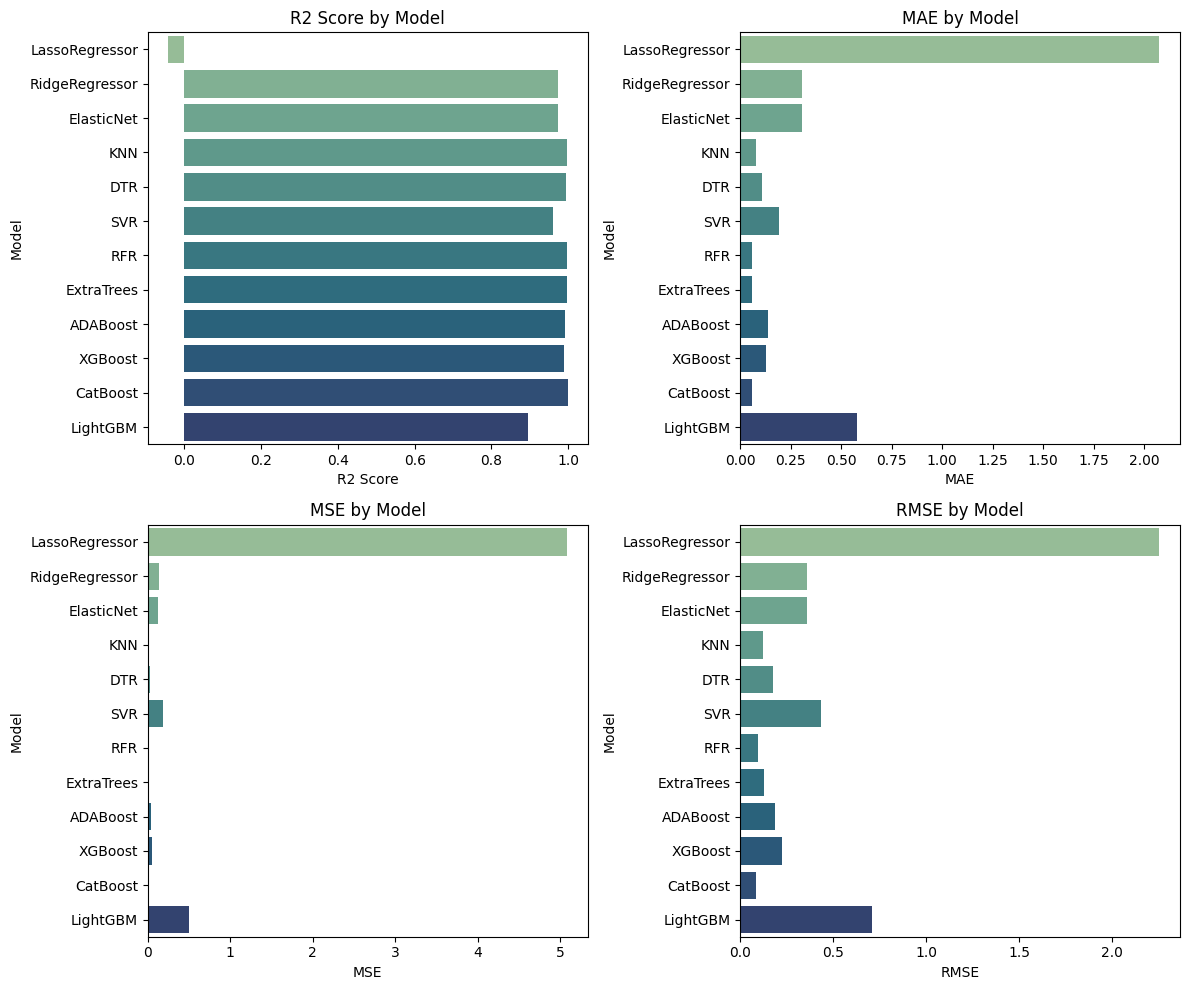

In [ ]:
# Plotting evaluation metrics in bar chart:

metrics = ['R2 Score', 'MAE', 'MSE', 'RMSE']
values = [r2_list, mae_list, mse_list, rmse_list]


fig, axes = plt.subplots(2, 2, figsize=(12, 10))


for i, ax in enumerate(axes.flatten()):
    sns.barplot(x=values[i], y=model_list, orient='h', ax=ax, palette='crest')
    ax.set_xlabel(metrics[i])
    ax.set_ylabel('Model')
    ax.set_title(f'{metrics[i]} by Model')

plt.tight_layout()
plt.show()

**1- First Top Model : Catboost Regressor**

In [ ]:
CatBoost = CatBoostRegressor(random_state=42)
CatBoost.fit(X_train_transformed, y_train)

Learning rate set to 0.025083
0:	learn: 2.0926429	total: 5.25ms	remaining: 5.24s
1:	learn: 2.0580766	total: 8.26ms	remaining: 4.12s
2:	learn: 2.0206281	total: 9.05ms	remaining: 3.01s
3:	learn: 1.9836718	total: 9.6ms	remaining: 2.39s
4:	learn: 1.9494032	total: 10.6ms	remaining: 2.12s
5:	learn: 1.9139277	total: 11.7ms	remaining: 1.93s
6:	learn: 1.8827794	total: 12.7ms	remaining: 1.79s
7:	learn: 1.8497248	total: 13.6ms	remaining: 1.69s
8:	learn: 1.8162847	total: 14.6ms	remaining: 1.61s
9:	learn: 1.7853659	total: 15.8ms	remaining: 1.56s
10:	learn: 1.7533461	total: 16.5ms	remaining: 1.49s
11:	learn: 1.7214944	total: 17ms	remaining: 1.4s
12:	learn: 1.6914335	total: 18.1ms	remaining: 1.37s
13:	learn: 1.6614869	total: 19.1ms	remaining: 1.35s
14:	learn: 1.6311222	total: 20.1ms	remaining: 1.32s
15:	learn: 1.6031193	total: 21.1ms	remaining: 1.3s
16:	learn: 1.5732240	total: 22.1ms	remaining: 1.28s
17:	learn: 1.5437666	total: 23.1ms	remaining: 1.26s
18:	learn: 1.5160648	total: 24ms	remaining: 1.24s

In [ ]:
y_pred =CatBoost.predict(X_test_transformed)

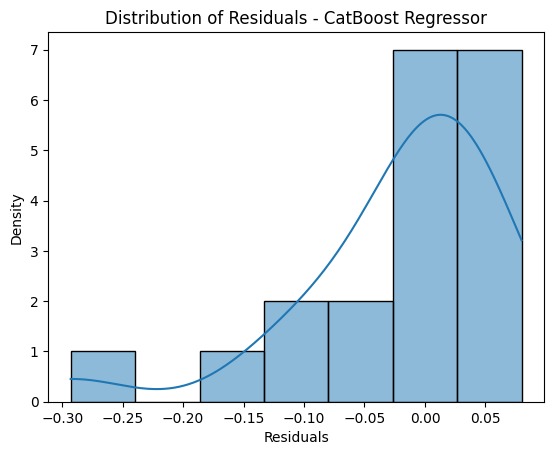

In [ ]:
# Calculate residuals
residuals = y_test.values.flatten() - y_pred.flatten()

# Visualize residuals
#sns.kdeplot(residuals)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals - CatBoost Regressor')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

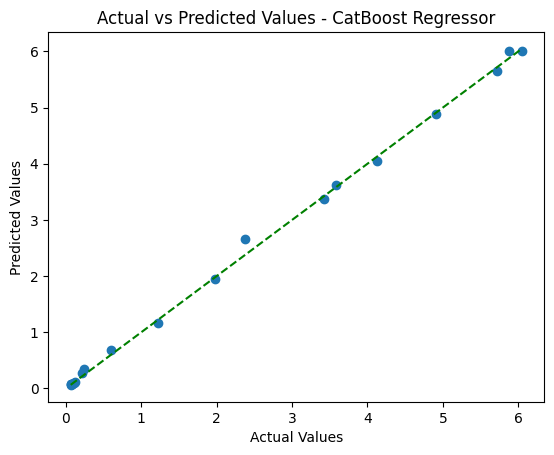

In [ ]:
# Line Plot: Actual vs Predicted Values

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='green', label='Actual')
plt.scatter(y_test, y_pred, label='CatBoost Regressor Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - CatBoost Regressor')
plt.show()

# Ploting the Learning Curve

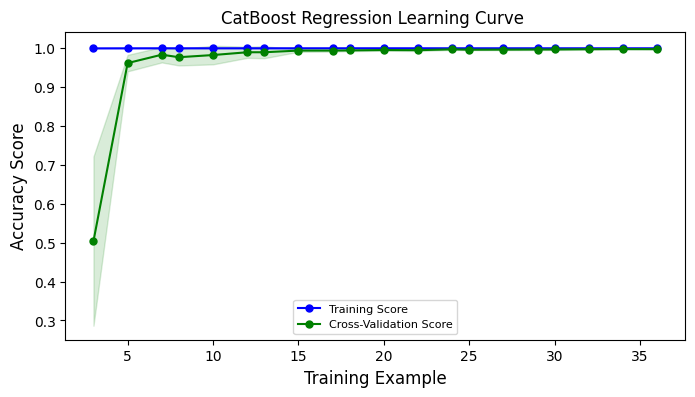

In [ ]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=CatBoost, X=X_train_transformed, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 20), n_jobs=-1)

plt.figure(figsize=(8,4))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('CatBoost Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()

**2- Second Top Model : RFR Regressor**

In [ ]:
RFR = RandomForestRegressor(random_state=42)
RFR.fit(X_train_transformed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred =RFR.predict(X_test_transformed)

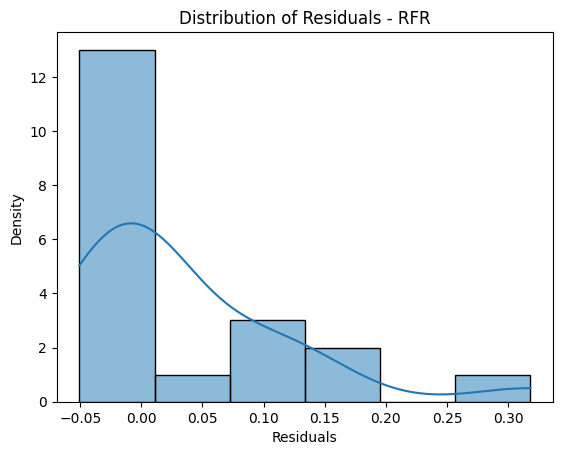

In [ ]:
# Calculate residuals
residuals = y_test.values.flatten() - y_pred.flatten()

# Visualize residuals
#sns.kdeplot(residuals)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals - RFR')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

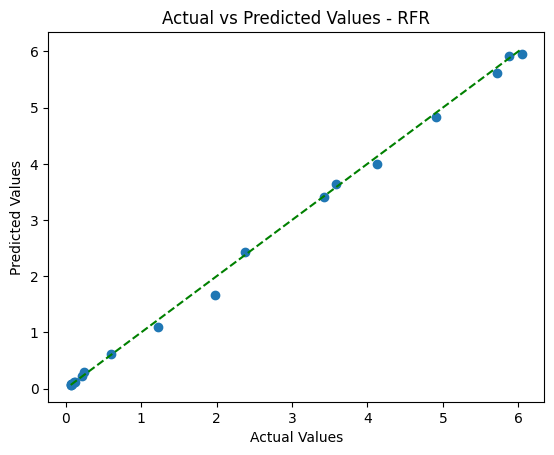

In [ ]:
# Line Plot: Actual vs Predicted Values

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='green', label='Actual')
plt.scatter(y_test, y_pred, label='RFR Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - RFR')
plt.show()

# Ploting the Learning Curve

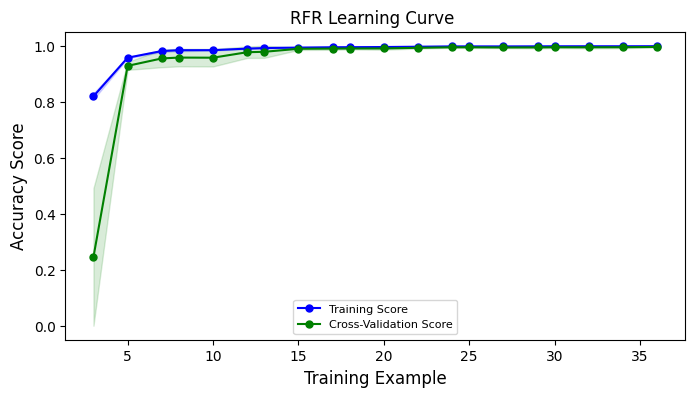

In [ ]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=RFR, X=X_train_transformed, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 20), n_jobs=-1)

plt.figure(figsize=(8,4))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('RFR Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()